In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
from google.colab import drive #importing the drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


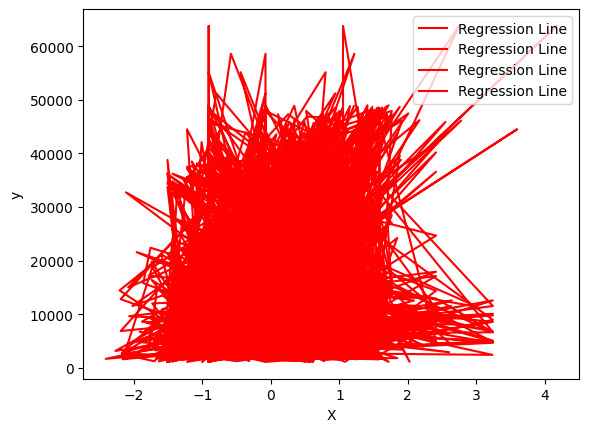

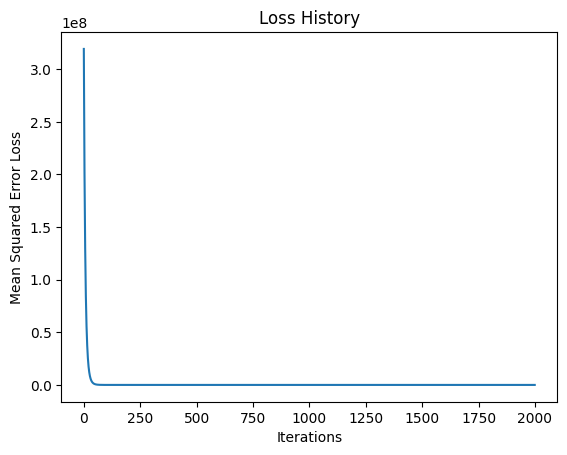

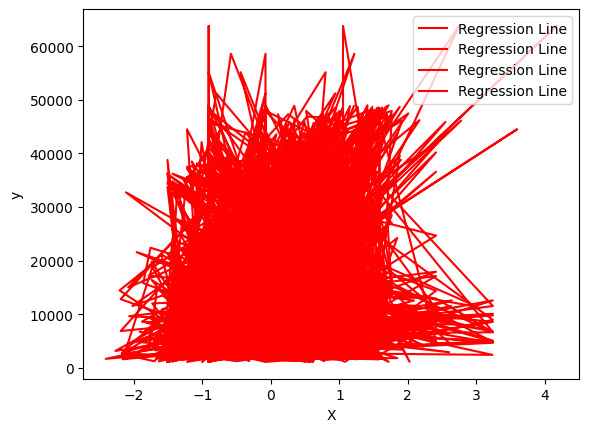

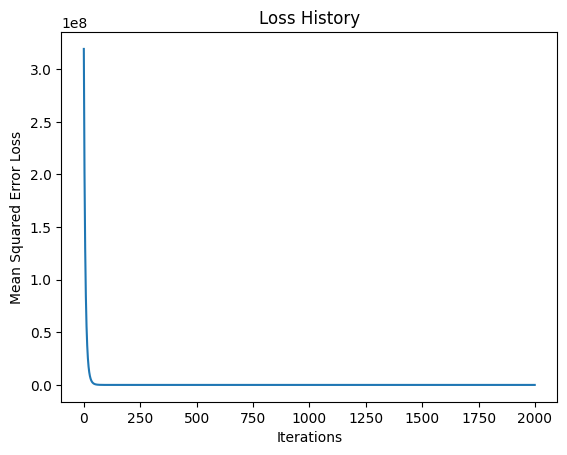

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.random.randn(n_features)
        self.bias = np.random.randn()

        loss_history = []

        for _ in range(self.n_iterations):
            # Predict the target values
            y_pred = self.predict(X)

            # Calculate mean squared error loss
            mse_loss = np.mean((y_pred - y) ** 2)
            loss_history.append(mse_loss)

            # Calculate gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

        return loss_history

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def plot_regression_line(self, X, y):
      
        plt.plot(X, self.predict(X), color='r', label='Regression Line')
        plt.xlabel('X')
        plt.ylabel('y')
        plt.legend()
        plt.show()


# Load the dataset
data = pd.read_csv('/content/Medical Price Dataset.csv')



# Identify non-numeric columns
non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns.tolist()

# Extract the features and target variable
X = data.drop(columns=non_numeric_cols).values
y = data.iloc[:, -1].values

# Normalize the features
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std

# Split the data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Create and train the linear regression model
model = LinearRegression(learning_rate=0.07, n_iterations=2000)
loss_history = model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Plot the regression line
model.plot_regression_line(X_train, y_train)  # Use X_train and y_train here instead of X_test and y_test

# Plot the loss history
plt.plot(loss_history)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error Loss')
plt.title('Loss History')
plt.show()
